In [1]:
import texthero as hero
import pandas as pd
import MeCab

In [2]:
# file_path = '../data/livedoornews.csv'
# text_column = 'body'
# topic_column = 'media'

In [3]:
file_path = '../data/sample_data.csv'
text_column = 'text'
topic_column = 'topic'

In [4]:
df = pd.read_csv(file_path)
df.rename(columns={text_column: 'text'}, inplace=True)
df.rename(columns={topic_column: 'topic'}, inplace=True)
df.dropna(how='any', inplace=True)
df = df[['topic', 'text']]
len(df)

6

In [5]:
stop_words = []
for word in open('../dicts/stopwords.txt'):
    word = word.replace('\n', '')
    if word: stop_words.append(word)

In [6]:
stop_words[:10]

['あそこ', 'あたり', 'あちら', 'あっち', 'あと', 'あな', 'あなた', 'あれ', 'いくつ', 'いつ']

In [7]:
tagger = MeCab.Tagger('')
pos_list = ['名詞', '動詞', '形容詞']

def wakati(text):
    node = tagger.parseToNode(text)
    words = []

    while node:
        pos = node.feature.split(',')[0]
        surface = node.surface
        if pos in pos_list and surface not in stop_words:
            words.append(surface)
        node = node.next
    return ' '.join(words)

In [8]:
df['wakati_text'] = df['text'].apply(lambda x: wakati(x))

In [9]:
df

,topic,text,wakati_text
0,エンタメ,新曲「約束」のリリースを目前に控えるフレンズが、ワンマンライブツアー「UNO！」を開催するこ...,新曲 約束 リリース 目前 控える フレンズ ワンマンライブツアー UNO 開催 する 決定...
1,エンタメ,PLOT SCRAPSが、前作ミニアルバム『INVOKE』から約1年ぶりとなる新曲「Tele...,PLOT SCRAPS 前作 ミニ アルバム INVOKE 1 なる 新曲 Telephon...
2,エンタメ,若者の特殊詐欺への加担を防ごうと、大阪府警は１２日、ホームページ上でアイドルグループ「ＮＭＢ...,若者 特殊 詐欺 加担 防ご 大阪 府警 １ ２ ホームページ アイドル グループ ＮＭＢ ...
3,スポーツ,オリックス対巨人 8回裏オリックス2死二塁、左越え2点本塁打を放つ頓宮（撮影・清水貴仁）\n...,オリックス 対 巨人 8 裏 オリックス 2 死 二塁 越え 2 本塁打 放つ 頓宮 撮影 ...
4,スポーツ,20年関東大学リーグ1部3位、#atarimaeniCUPでも3位に入った順天堂大が21年の...,20 関東 大学 リーグ 1 3 位 # atarimaeniCUP 3 位 入っ 順天堂大...
5,スポーツ,横綱土俵入りをする鶴竜（2020年1月15日撮影）\n\n5場所連続休場が決まった横綱鶴竜に...,横綱 土俵入り する 鶴 竜 2020 1 15 撮影 5 場所 連続 休場 決まっ 横綱 ...


In [10]:
df['wakati_text'] = hero.clean(df['wakati_text'], pipeline=[
    hero.preprocessing.fillna,
    hero.preprocessing.remove_digits,
    hero.preprocessing.remove_whitespace,
])

/Users/youichiro.ogawa/.pyenv/versions/texthero/lib/python3.8/site-packages/texthero/preprocessing.py:72: FutureWarning: The default value of regex will change from True to False in a future version.
  return input.str.replace(pattern, symbols)


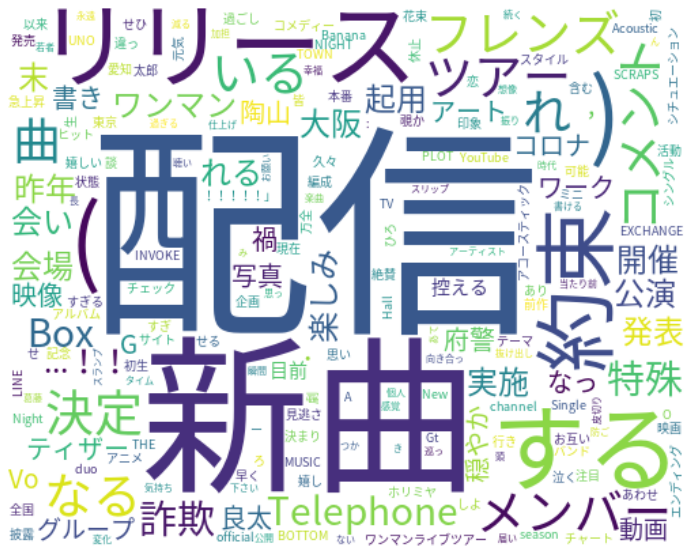

In [11]:
topic_1 = df[df['topic'] == 'エンタメ']['wakati_text']
hero.visualization.wordcloud(topic_1, font_path='../fonts/NotoSansCJKJP/NotoSansCJKjp-Regular.otf', colormap='viridis', width=500, height=400, background_color='White')

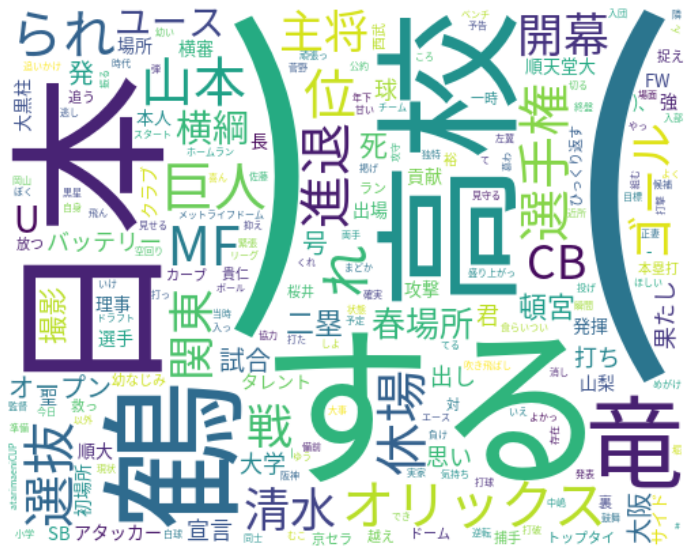

In [12]:
topic_2 = df[df['topic'] == 'スポーツ']['wakati_text']
hero.visualization.wordcloud(topic_2, font_path='../fonts/Noto-unhinted/NotoSansCJKjp-Regular.otf', colormap='viridis', width=500, height=400, background_color='White')

In [13]:
df[df['topic'] == 'エンタメ']

,topic,text,wakati_text
0,エンタメ,新曲「約束」のリリースを目前に控えるフレンズが、ワンマンライブツアー「UNO！」を開催するこ...,新曲 約束 リリース 目前 控える フレンズ ワンマンライブツアー UNO 開催 する 決定...
1,エンタメ,PLOT SCRAPSが、前作ミニアルバム『INVOKE』から約1年ぶりとなる新曲「Tele...,PLOT SCRAPS 前作 ミニ アルバム INVOKE なる 新曲 Telephone ...
2,エンタメ,若者の特殊詐欺への加担を防ごうと、大阪府警は１２日、ホームページ上でアイドルグループ「ＮＭＢ...,若者 特殊 詐欺 加担 防ご 大阪 府警 ホームページ アイドル グループ ＮＭＢ 起用 啓...


In [14]:
df['pca'] = df['wakati_text'].pipe(hero.tfidf).pipe(hero.pca)

In [15]:
hero.scatterplot(df, 'pca', color='topic', title='topic')